In [72]:
import pickle
import numpy as np
import pandas as pd
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv('indian_liver_patient.csv', sep=',')
data
# data.info()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Liver
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,Non Liver
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,Liver
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,Liver
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,Liver


In [74]:
# showing column wise %ge of NaN values they contains
null_col = []
for i in data.columns:
  print(i,"\t-\t", data[i].isna().mean()*100)
  if data[i].isna().mean()*100 > 0:
    null_col.append(i)

Age 	-	 0.0
Gender 	-	 0.0
Total_Bilirubin 	-	 0.0
Direct_Bilirubin 	-	 0.0
Alkaline_Phosphotase 	-	 0.0
Alamine_Aminotransferase 	-	 0.0
Aspartate_Aminotransferase 	-	 0.0
Total_Protiens 	-	 0.0
Albumin 	-	 0.0
Albumin_and_Globulin_Ratio 	-	 0.6861063464837049
Dataset 	-	 0.0


In [75]:
for i in null_col:
  data[i] = data[i].fillna(data[i].mean())

# lets check for null values again
for i in data.columns:
  print(i,"\t-\t", data[i].isna().mean()*100)

Age 	-	 0.0
Gender 	-	 0.0
Total_Bilirubin 	-	 0.0
Direct_Bilirubin 	-	 0.0
Alkaline_Phosphotase 	-	 0.0
Alamine_Aminotransferase 	-	 0.0
Aspartate_Aminotransferase 	-	 0.0
Total_Protiens 	-	 0.0
Albumin 	-	 0.0
Albumin_and_Globulin_Ratio 	-	 0.0
Dataset 	-	 0.0


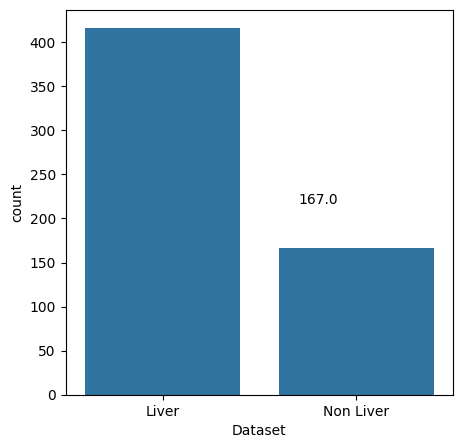

In [76]:
# Checking for unbalanced dataset

plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=data)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [77]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
x, y = oversample.fit_resample(data.drop(['Dataset'], axis=1), data['Dataset'])

new_df = pd.DataFrame(x, columns=data.drop(['Dataset'], axis=1).columns)
new_df['Dataset'] = y

new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Liver
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Liver
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Liver
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Liver
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Liver


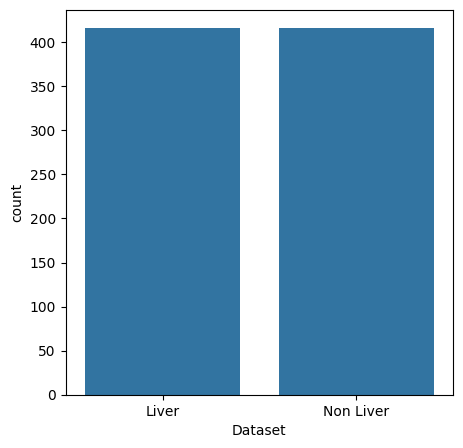

In [78]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [107]:
new_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
827,37,1,0.8,0.2,195,60,40,8.2,5.0,1.50,1
828,36,1,0.8,0.2,182,31,34,6.4,3.8,1.40,1
829,36,1,0.8,0.2,158,29,39,6.0,2.2,0.50,1
830,47,0,0.8,0.2,236,10,13,6.7,2.9,0.76,1


In [80]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         832 non-null    int64  
 1   Gender                      832 non-null    object 
 2   Total_Bilirubin             832 non-null    float64
 3   Direct_Bilirubin            832 non-null    float64
 4   Alkaline_Phosphotase        832 non-null    int64  
 5   Alamine_Aminotransferase    832 non-null    int64  
 6   Aspartate_Aminotransferase  832 non-null    int64  
 7   Total_Protiens              832 non-null    float64
 8   Albumin                     832 non-null    float64
 9   Albumin_and_Globulin_Ratio  832 non-null    float64
 10  Dataset                     832 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 71.6+ KB


In [81]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
new_df['Gender'] = enc.fit_transform(new_df['Gender'].astype('str'))

In [82]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
new_df['Dataset'] = enc.fit_transform(new_df['Dataset'].astype('str'))

In [83]:
new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [84]:
for i in new_df.select_dtypes(include=['object']).columns:
  new_df[i] = new_df[i].astype(object).astype(float)

<Axes: >

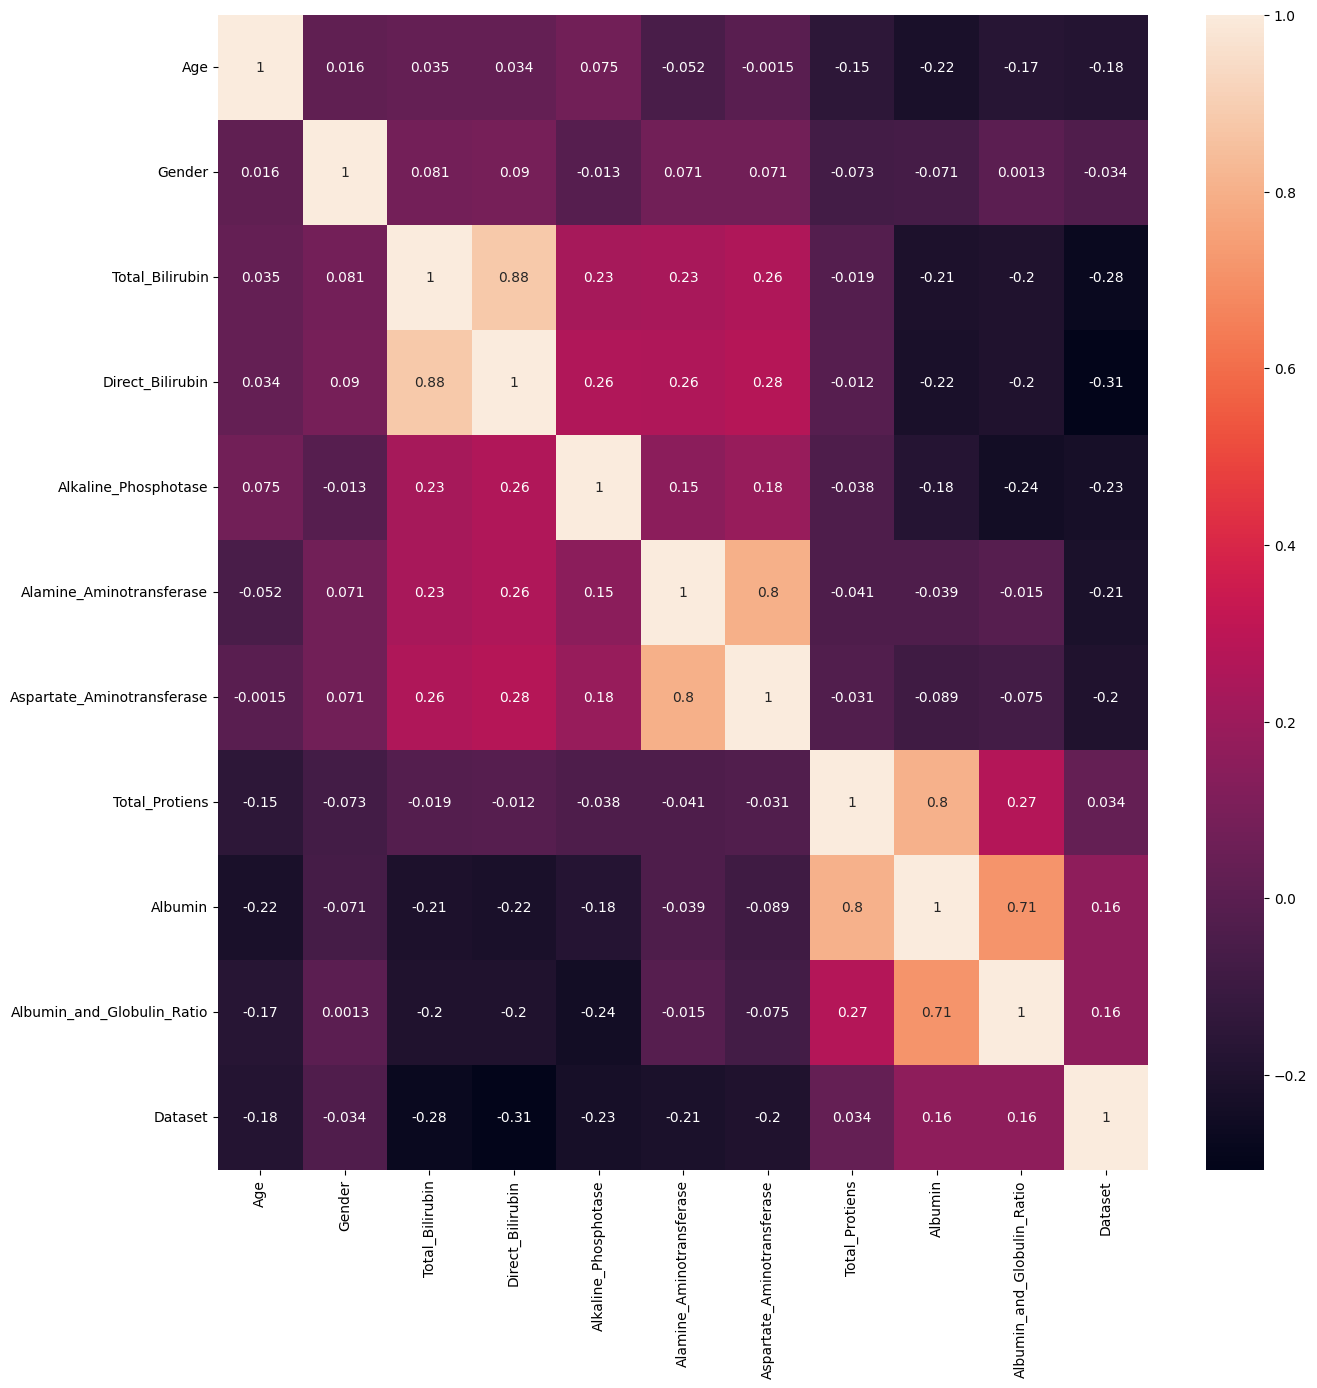

In [85]:
cormap = new_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormap, annot = True)

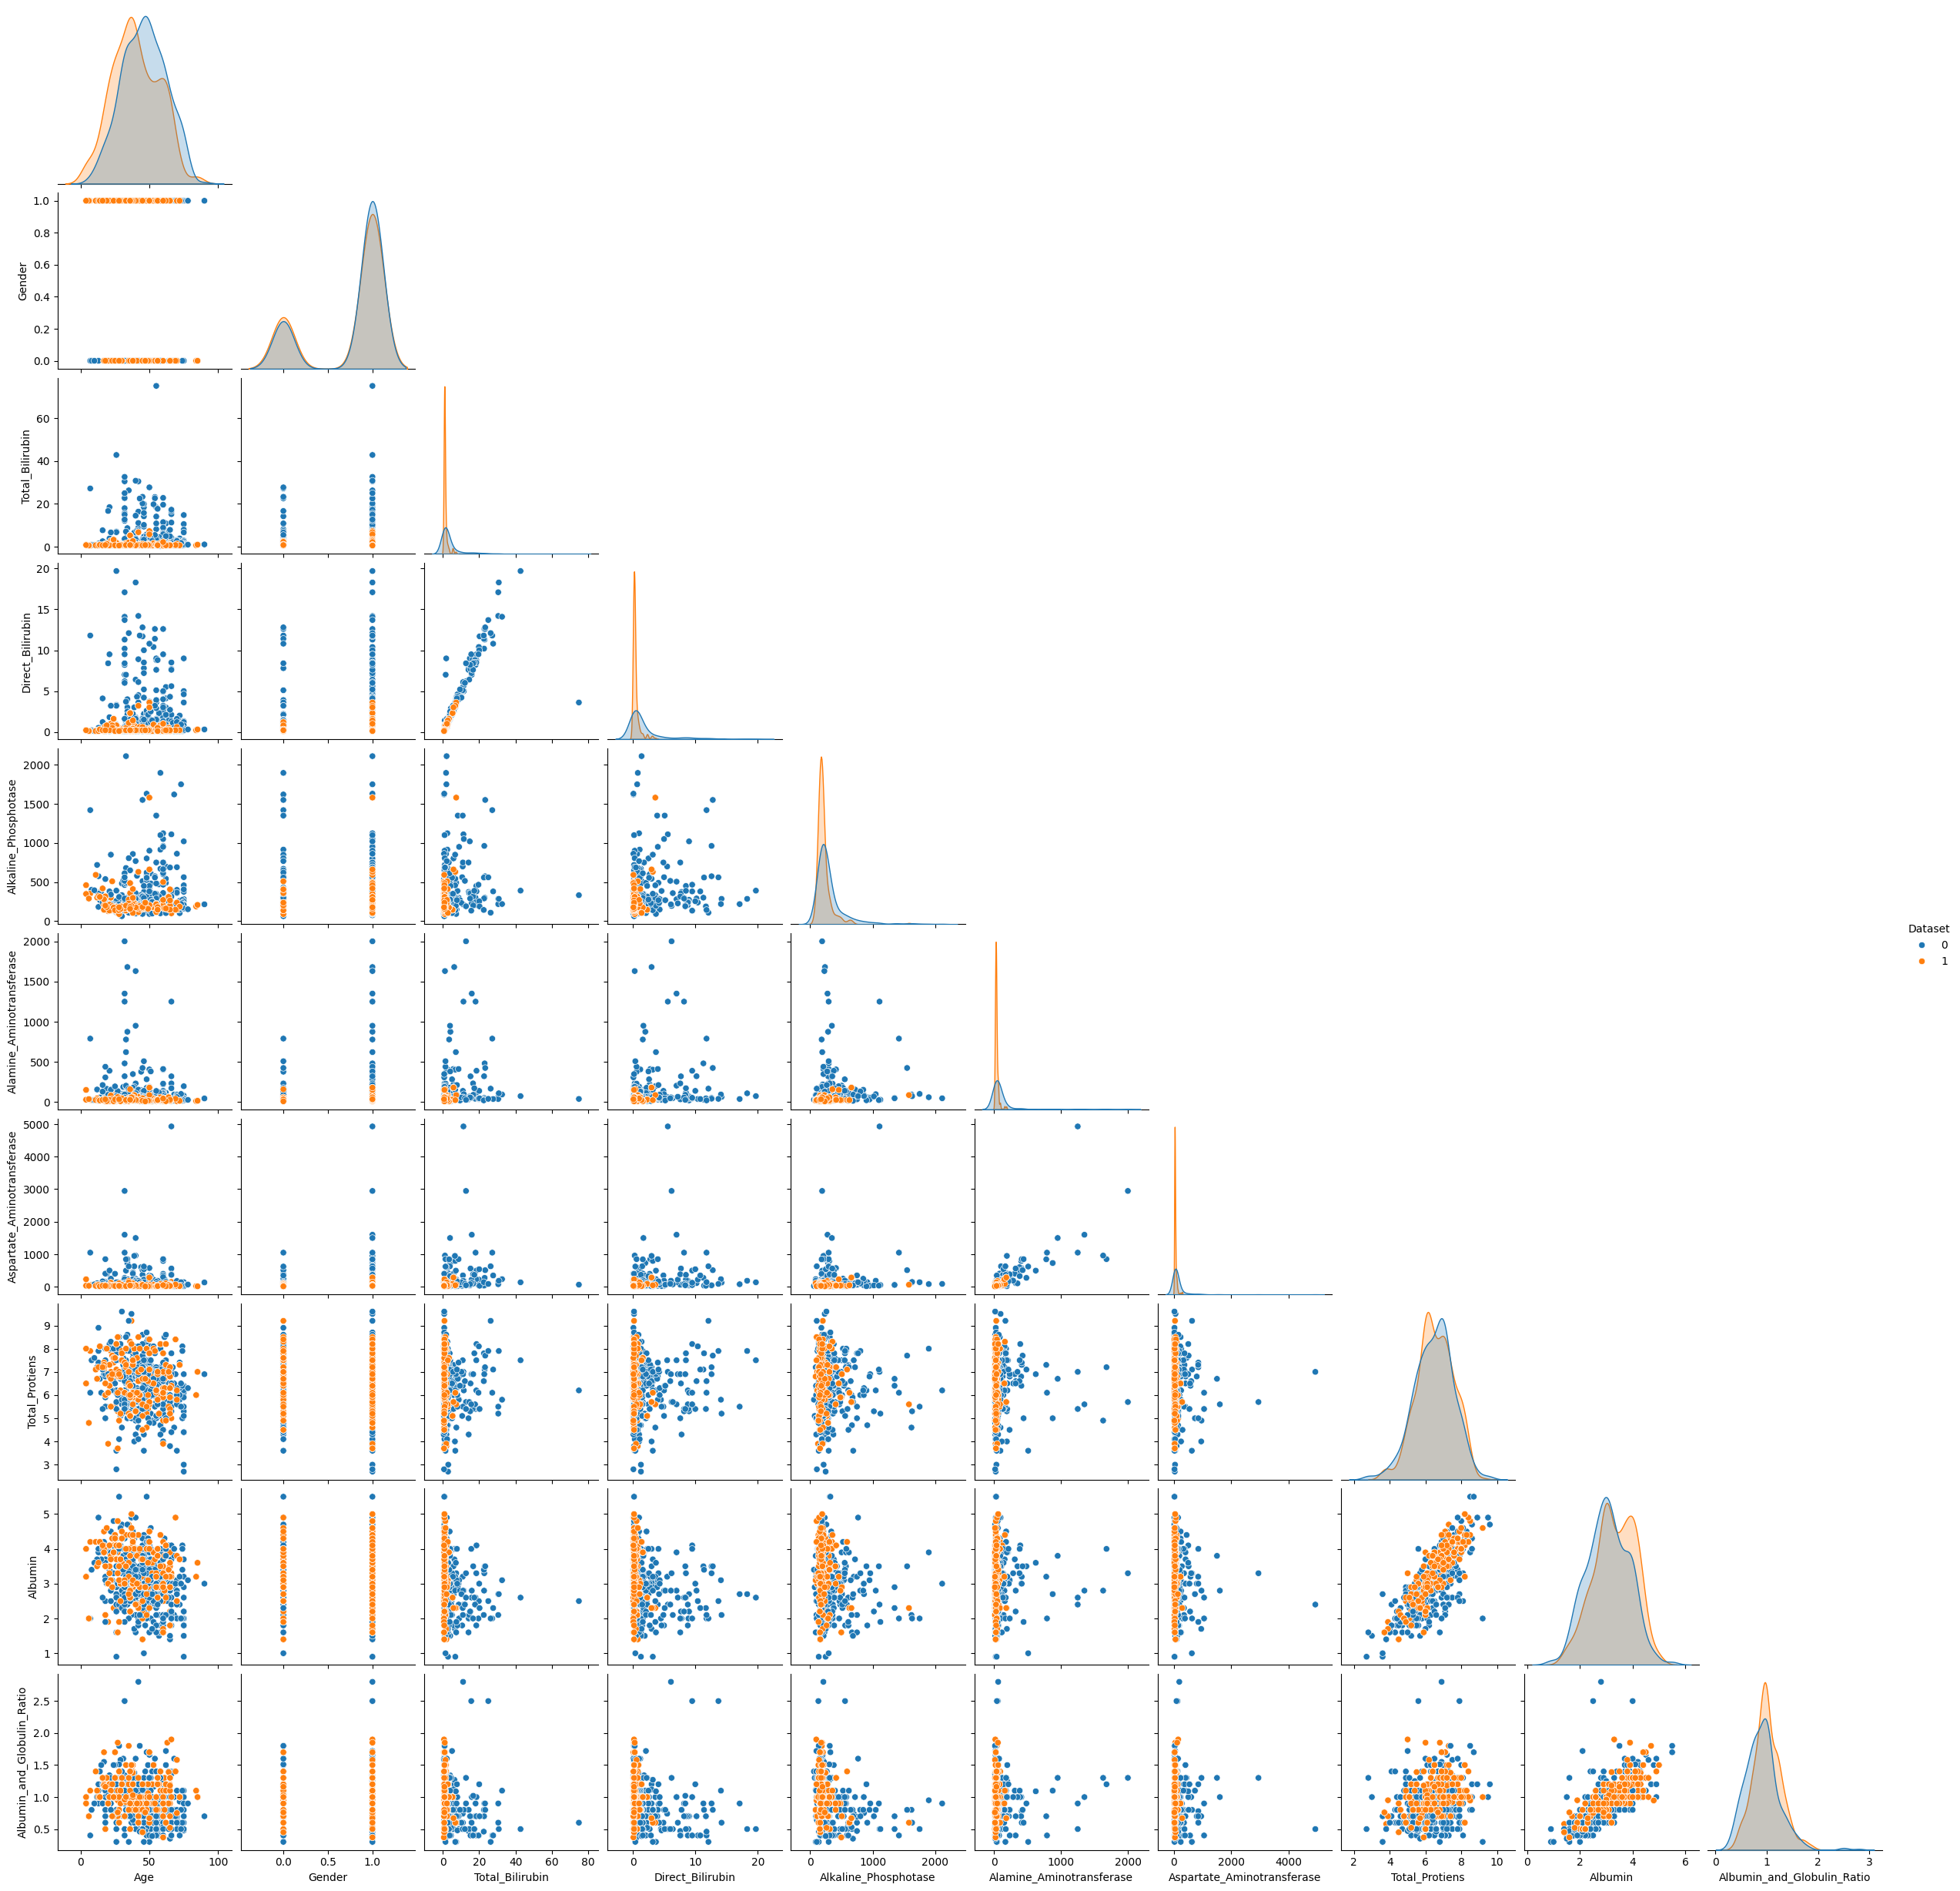

In [86]:
sns.pairplot(data=new_df, hue='Dataset', corner=True)

KNN (pake kaggle)

In [87]:
X = new_df.drop(['Dataset'], axis=1)
y = new_df['Dataset']

In [88]:
# Scale the data to be between -1 and 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.324569,-1.801360,-0.374792,-0.446336,-0.379542,-0.325466,-0.293647,0.288774,0.144690,-0.206659
1,1.142904,0.555136,1.543565,1.785743,1.968429,-0.015670,0.041562,0.951170,0.017302,-0.737623
2,1.142904,0.555136,0.866498,1.207056,1.009980,-0.041486,-0.089251,0.478030,0.144690,-0.239845
3,0.900684,0.555136,-0.318370,-0.322332,-0.402472,-0.338374,-0.285471,0.288774,0.272079,0.125193
4,1.748454,0.555136,0.227045,0.339025,-0.342855,-0.254471,-0.126042,0.761914,-1.001809,-1.865922


In [89]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [90]:
# model training 

from sklearn.neighbors import KNeighborsClassifier as KNN

model= KNN()   
model.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [122]:
from sklearn.model_selection import GridSearchCV
n_neighbors = [x for x in range(1, 11, 2)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']

grid = {'n_neighbors': n_neighbors,
        'algorithm': algorithm,
        'weights': weights}

In [123]:


new_model = KNN() 

knn_grid = GridSearchCV(estimator = new_model, param_grid = grid, cv = 7, verbose=0)
knn_grid.fit(X_train, y_train)



GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [94]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [95]:
y_pred = knn_grid.best_estimator_.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df

,Actual,Predicted
792,1,1
148,0,1
722,1,1
23,0,1
127,0,1
...,...,...
74,0,0
505,0,0
633,1,1
177,0,0


<Axes: >

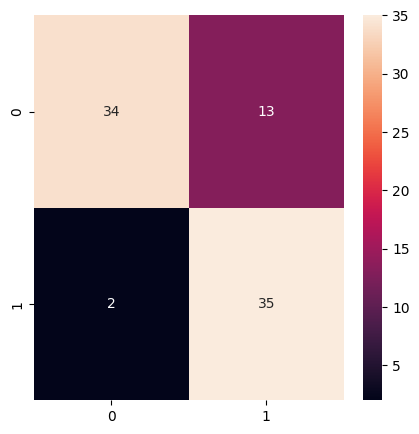

In [96]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

In [97]:
# FOLD = 10
kfold = KFold(n_splits=7)
scores = ['accuracy', 'precision', 'recall']
results = cross_validate(knn_grid, X_test, y_test, cv=kfold, scoring=scores, return_train_score=True)
results_data_1 = pd.DataFrame(results)
# results_data_1

In [98]:
print("PERFORMANCE MODEL KNN")

accuracy = results_data_1.test_accuracy.mean() * 100
precision = results_data_1.test_precision.mean() * 100
recall = results_data_1.test_recall.mean() * 100

print("Accuracy : %0.2f" % accuracy, "%")
print("Precision : %0.2f " % precision, "%")
print("Recall : %0.2f " % recall, "%")

PERFORMANCE MODEL KNN
Accuracy : 59.52 %
Precision : 52.93  %
Recall : 62.11  %


In [99]:
from sklearn import metrics

# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(y_pred, y_test)*100))
print("Precision score of the predictions: {value:.2f} %".format(value=metrics.precision_score(y_pred, y_test)*100))

Accuracy score of the predictions: 82.14 %
Precision score of the predictions: 94.59 %


In [110]:
# AMBIL LABEL SETIAP BARIS
label = new_df.iloc[:,-1:].values.ravel()
label

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [111]:
# AMBIL FEATURE DATA
feature = new_df.iloc[:,:-1]
feature.values

array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [36.  ,  1.  ,  0.8 , ...,  6.  ,  2.2 ,  0.5 ],
       [47.  ,  0.  ,  0.8 , ...,  6.7 ,  2.9 ,  0.76],
       [28.  ,  1.  ,  0.6 , ...,  6.9 ,  4.1 ,  1.4 ]])

In [112]:
# PEMBAGIAN DATA LATIH DAN DATA UJI SEBANYAK 80% UNTUK DATA LATIH 20% UNTUK DATA TEST
X_train, X_test, y_train, y_test = train_test_split(feature, label ,test_size=0.3)

In [113]:
print("Jumlah Data Latih:", len(X_train))
print("Jumlah Data Uji:", len(X_test))

Jumlah Data Latih: 582
Jumlah Data Uji: 250


In [114]:
# PEMODELAN MENGGUNAKAN KNN
clf = KNeighborsClassifier(n_neighbors=3)

# FITTING DATA TRAINING
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [115]:
pred = clf.predict(X_test)
pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1])

In [116]:
cols = {
    'Y True' : y_test,
    'Predict' : pred,
}

print("Prediksi Yang Dihasilkan")
pd.DataFrame(cols)

Prediksi Yang Dihasilkan


,Y True,Predict
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
245,1,1
246,1,0
247,1,1
248,1,0


In [117]:
# FOLD = 10
kfold = KFold(n_splits=10)
scores = ['accuracy', 'precision', 'recall']
results = cross_validate(clf, X_test, y_test, cv=kfold, scoring=scores, return_train_score=True)
results_data = pd.DataFrame(results)
results_data

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.019994,0.060001,0.88,0.795556,0.800000,0.742857,1.000000,0.912281
1,0.009989,0.017993,0.72,0.800000,0.642857,0.757353,0.818182,0.895652
2,0.011013,0.026984,0.64,0.813333,0.700000,0.755725,0.823529,0.908257
3,0.006987,0.021002,0.80,0.800000,0.733333,0.763359,0.916667,0.877193
4,0.003001,0.011000,0.68,0.808889,0.666667,0.753623,0.769231,0.920354
5,0.004002,0.007997,0.48,0.822222,0.363636,0.771429,0.400000,0.931034
6,0.003993,0.008997,0.64,0.795556,0.636364,0.750000,0.583333,0.894737
7,0.004001,0.009998,0.60,0.808889,0.500000,0.766423,0.600000,0.905172
8,0.004002,0.022998,0.76,0.777778,0.846154,0.729323,0.733333,0.873874
9,0.006013,0.037991,0.68,0.800000,0.666667,0.755725,0.857143,0.883929


In [118]:
print("PERFORMANCE MODEL KNN")

accuracy = results_data.test_accuracy.mean() * 100
precision = results_data.test_precision.mean() * 100
recall = results_data.test_recall.mean() * 100

print("Accuracy : %0.2f" % accuracy, "%")
print("Precision : %0.2f " % precision, "%")
print("Recall : %0.2f " % recall, "%")

PERFORMANCE MODEL KNN
Accuracy : 68.80 %
Precision : 65.56  %
Recall : 75.01  %


In [119]:
from sklearn import metrics

# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(pred, y_test)*100))
print("Precision score of the predictions: {value:.2f} %".format(value=metrics.precision_score(pred, y_test)*100))

Accuracy score of the predictions: 77.60 %
Precision score of the predictions: 84.92 %


In [121]:
pickle.dump(clf, open('model_baru.pkl','wb'))